<a href="https://colab.research.google.com/github/PreciousGemstone/CSSI-97-Project-insert_team_name-/blob/main/Project_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

In [ ]:
def three_metrics(y_test, y_pred):

  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)


  print("Mean Squared Error: " + str(mse))
  print("Mean Absolute Error: " + str(mae))
  print("r2 score: " + str(r2))

In [ ]:
#@title get_data function
def get_data():
  data = 'https://raw.githubusercontent.com/PreciousGemstone/CSSI-97-Project-insert_team_name-/refs/heads/main/laptop_prices.csv'
  laptop = pd.read_csv(data)
  #AI helped write this code

  def categorize_cpu(cpu_model):
      if isinstance(cpu_model, str):
          cpu_model_lower = cpu_model.lower()
          if 'core i7' in cpu_model_lower:
              return 'Core i7'
          elif 'core i5' in cpu_model_lower:
              return 'Core i5'
          elif 'core i3' in cpu_model_lower:
              return 'Core i3'
          elif 'ryzen' in cpu_model_lower:
              return 'Ryzen'
          elif 'celeron' in cpu_model_lower:
              return 'Celeron'
          elif 'atom' in cpu_model_lower:
              return 'Atom'
          elif 'xeon' in cpu_model_lower:
              return 'Xeon'
          elif 'a' in cpu_model_lower and '-series' in cpu_model_lower:
              return 'A-Series'
          elif 'e' in cpu_model_lower and '-series' in cpu_model_lower:
              return 'E-Series'
          elif 'fx' in cpu_model_lower:
              return 'FX-Series'
          elif 'pentium' in cpu_model_lower:
              return 'Pentium'
          elif 'core m' in cpu_model_lower:
              return 'Core M'
          elif 'cortex' in cpu_model_lower:
              return 'Cortex'
          else:
              return 'Other'
      return 'Unknown'

  laptop['CPU_categories'] = laptop['CPU_model'].apply(categorize_cpu)

  def categorize_gpu(gpu_model):
      if isinstance(gpu_model, str):
          gpu_model_lower = gpu_model.lower()
          if 'geforce gtx' in gpu_model_lower:
              return 'Nvidia GeForce GTX'
          elif 'geforce mx' in gpu_model_lower:
              return 'Nvidia GeForce MX'
          elif 'geforce' in gpu_model_lower:
              return 'Nvidia GeForce'
          elif 'quadro' in gpu_model_lower:
              return 'Nvidia Quadro'
          elif 'nvidia' in gpu_model_lower:
              return 'Nvidia (Other)'
          elif 'radeon pro' in gpu_model_lower:
              return 'AMD Radeon Pro'
          elif 'radeon' in gpu_model_lower:
              return 'AMD Radeon'
          elif 'amd' in gpu_model_lower:
              return 'AMD (Other)'
          elif 'iris plus graphics' in gpu_model_lower:
              return 'Intel Iris Plus'
          elif 'hd graphics' in gpu_model_lower:
              return 'Intel HD Graphics'
          elif 'intel' in gpu_model_lower or 'graphics' in gpu_model_lower:
              return 'Intel (Other)'
          else:
              return 'Other'
      return 'Unknown'

  laptop['GPU_categories'] = laptop['GPU_model'].apply(categorize_gpu)

  #No more AI after this

  improved_laptop=laptop.drop(['CPU_model','GPU_model'],axis=1)
  improved_laptop=improved_laptop.drop(['Product','Company','TypeName','OS', 'CPU_company', 'GPU_company'],axis=1)

  improved_laptop = pd.get_dummies(improved_laptop, columns=['CPU_categories','GPU_categories', 'Touchscreen', 'PrimaryStorageType','SecondaryStorageType',
                                                           'Screen', 'RetinaDisplay','IPSpanel'], drop_first=True, dtype=int)

  improved_laptop_noscale = improved_laptop
  laptop_prices = improved_laptop[['Price_euros']]
  improved_laptop_features = improved_laptop.drop('Price_euros', axis=1)


  improved_laptop_onehot = improved_laptop_features.drop(['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH',
                                                'CPU_freq', 'PrimaryStorage', 'SecondaryStorage'],axis=1)
  improved_laptop_continous = improved_laptop_features[['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH',
                                                'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']]

  scaler = StandardScaler()
  price_scaler = StandardScaler()

  improved_laptop_continous_scaled = scaler.fit_transform(improved_laptop_continous)
  laptop_prices_scaled = price_scaler.fit_transform(laptop_prices)

  improved_laptop_continous = pd.DataFrame(improved_laptop_continous_scaled, columns= improved_laptop_continous.columns)
  laptop_prices = pd.DataFrame(laptop_prices_scaled, columns= laptop_prices.columns)

  improved_laptop = pd.concat([improved_laptop_continous, improved_laptop_onehot], axis=1)

  improved_laptop_wprice = pd.concat([laptop_prices, improved_laptop], axis=1)

  X, y = improved_laptop.values, laptop_prices.values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)
  return(X_train, X_test, y_train, y_test, scaler, price_scaler, improved_laptop, improved_laptop_wprice, laptop_prices, improved_laptop_continous, improved_laptop_noscale)


X_train, X_test, y_train, y_test, scaler, price_scaler, improved_laptop, improved_laptop_wprice, laptop_prices, improved_laptop_continous, improved_laptop_noscale = get_data()


In [ ]:
display(improved_laptop_wprice)

,Price_euros,Inches,Ram,Weight,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,CPU_categories_Atom,...,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,Screen_Full HD,Screen_Quad HD+,Screen_Standard,RetinaDisplay_Yes,IPSpanel_Yes
0,0.292259,-1.205746,-0.086499,-1.002380,1.338239,1.853934,-0.005918,-0.866236,-0.423449,0,...,0,1,0,1,0,0,0,1,1,1
1,-0.336954,-1.205746,-0.086499,-1.047227,-0.932863,-0.612830,-0.998674,-0.866236,-0.423449,0,...,0,0,0,1,0,0,0,1,0,0
2,-0.799410,0.403873,-0.086499,-0.269871,0.040466,0.021481,0.391185,-0.515929,-0.423449,0,...,0,1,0,1,0,1,0,0,0,0
3,2.002178,0.263906,1.483418,-0.314718,1.987125,2.558724,0.788288,0.184684,-0.423449,0,...,0,1,0,1,0,0,0,1,1,1
4,0.954536,-1.205746,-0.086499,-1.002380,1.338239,1.853934,1.582493,-0.515929,-0.423449,0,...,0,1,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,-0.709472,-0.715862,-0.871458,-0.359566,0.040466,0.021481,0.391185,-0.866236,-0.423449,0,...,0,1,0,1,0,1,0,0,0,1
1271,0.519690,-1.205746,1.483418,-1.107024,2.636011,2.558724,0.391185,0.184684,-0.423449,0,...,0,1,0,1,0,0,1,0,0,1
1272,-1.293359,-0.715862,-1.263937,-0.808041,-1.082918,-1.077991,-1.395777,-1.041389,-0.423449,0,...,0,0,0,1,0,0,0,1,0,0
1273,-0.529594,0.403873,-0.478979,0.223452,-1.082918,-1.077991,0.391185,1.585909,-0.423449,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
display(improved_laptop_noscale)

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,CPU_categories_Atom,...,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,Screen_Full HD,Screen_Quad HD+,Screen_Standard,RetinaDisplay_Yes,IPSpanel_Yes
0,13.3,8,1.37,1339.69,2560,1600,2.3,128,0,0,...,0,1,0,1,0,0,0,1,1,1
1,13.3,8,1.34,898.94,1440,900,1.8,128,0,0,...,0,0,0,1,0,0,0,1,0,0
2,15.6,8,1.86,575.00,1920,1080,2.5,256,0,0,...,0,1,0,1,0,1,0,0,0,0
3,15.4,16,1.83,2537.45,2880,1800,2.7,512,0,0,...,0,1,0,1,0,0,0,1,1,1
4,13.3,8,1.37,1803.60,2560,1600,3.1,256,0,0,...,0,1,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,14.0,4,1.80,638.00,1920,1080,2.5,128,0,0,...,0,1,0,1,0,1,0,0,0,1
1271,13.3,16,1.30,1499.00,3200,1800,2.5,512,0,0,...,0,1,0,1,0,0,1,0,0,1
1272,14.0,2,1.50,229.00,1366,768,1.6,64,0,0,...,0,0,0,1,0,0,0,1,0,0
1273,15.6,6,2.19,764.00,1366,768,2.5,1024,0,0,...,0,0,0,1,0,0,0,1,0,0


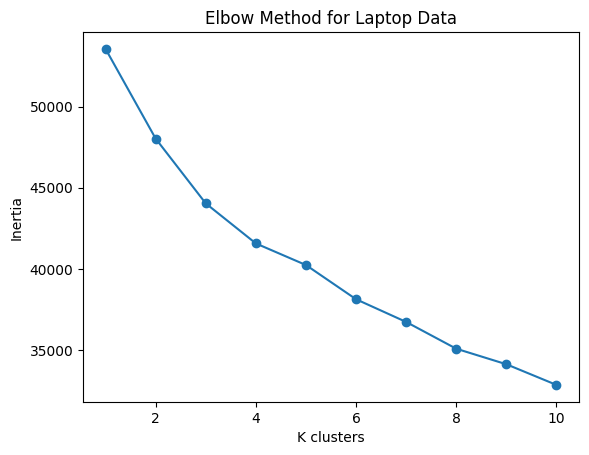

         Price_euros    Inches       Ram    Weight   ScreenW   ScreenH  \
cluster                                                                  
0          -0.746090  0.155126 -0.567684  0.060700 -0.658997 -0.660347   
1           0.239716 -0.534655  0.017227 -0.569230  0.366119  0.379363   
2           0.876727  0.921352  1.043075  1.180083  0.422940  0.395363   

         CPU_freq  PrimaryStorage  SecondaryStorage  CPU_categories_Atom  ...  \
cluster                                                                   ...   
0       -0.342566        0.712641         -0.418198             0.004264  ...   
1        0.000535       -0.403038         -0.416904             0.019643  ...   
2        0.651885       -0.441169          1.746346             0.000000  ...   

         PrimaryStorageType_Hybrid  PrimaryStorageType_SSD  \
cluster                                                      
0                         0.017058                0.134328   
1                         0.000000   

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
X = improved_laptop_wprice.select_dtypes(include=np.number).dropna() # Select all numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init to suppress warning
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('K clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Laptop Data')
plt.show()
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Added n_init to suppress warning
clusters = kmeans.fit_predict(X_scaled)
X['cluster'] = clusters

# Analyze clusters
print(X.groupby('cluster').mean())

In [ ]:
X = improved_laptop_noscale.select_dtypes(include=np.number).dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
x_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
x_scaled_df['cluster'] = clusters
weighted_mse = 0
for i in range(2):
    cluster_data = x_scaled_df[x_scaled_df['cluster'] == i].drop(columns='cluster')
    center = kmeans.cluster_centers_[i]
    mse = mean_squared_error(cluster_data, [center]*len(cluster_data))
    weight = len(cluster_data) / len(x_scaled_df)
    weighted_mse += weight * mse
print("Weighted MSE:", weighted_mse)



Weighted MSE: 0.8967729435927482


In [ ]:
X_raw = improved_laptop.select_dtypes(include=np.number).dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
X_raw['clusters'] = clusters
weighted_mse_raw = 0
for i in range(2):
    cluster_data = X_raw[X_raw['clusters']== i]. drop(columns='clusters')
    center = kmeans.cluster_centers_[i]
    mse = mean_squared_error(cluster_data, [center]*len(cluster_data))
    weight = len(cluster_data) / len(X_raw)
    weighted_mse_raw += weight * mse
print("Weighted MSE(W/O):", weighted_mse_raw)

Weighted MSE(W/O): 0.29936413042521426


<BarContainer object of 2 artists>

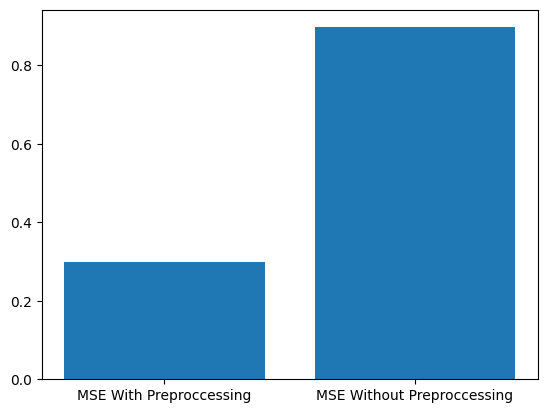

In [ ]:
import matplotlib.pyplot as plt
cluster_name = ['MSE With Preproccessing', 'MSE Without Preproccessing']
cluster_data = [weighted_mse_raw,weighted_mse]
plt.bar(cluster_name, cluster_data)